In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv(r"C:\Users\otaku7\Desktop\imdb_top_2000_movies.csv")


In [2]:
data

,Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Director,Cast,Gross
0,The Godfather,1972,175,9.2,100.0,"2,002,655","Crime, Drama",Francis Ford Coppola,Marlon Brando,$134.97M
1,The Godfather Part II,1974,202,9.0,90.0,"1,358,608","Crime, Drama",Francis Ford Coppola,Al Pacino,$57.30M
2,Ordinary People,1980,124,7.7,86.0,"56,476",Drama,Robert Redford,Donald Sutherland,$54.80M
3,Lawrence of Arabia,1962,218,8.3,100.0,"313,044","Adventure, Biography, Drama",David Lean,Peter O'Toole,$44.82M
4,Straw Dogs,1971,113,7.4,73.0,"64,331","Crime, Drama, Thriller",Sam Peckinpah,Dustin Hoffman,NaN
...,...,...,...,...,...,...,...,...,...,...
1995,The Young Victoria,2009,105,7.2,64.0,"66,235","Biography, Drama, History",Jean-Marc Vallée,Emily Blunt,$11.00M
1996,Tooth Fairy,I 2010,101,5.0,36.0,"49,527","Comedy, Family, Fantasy",Michael Lembeck,Dwayne Johnson,$60.02M
1997,The Informant!,2009,108,6.5,66.0,"67,318","Biography, Comedy, Crime",Steven Soderbergh,Matt Damon,$33.31M
1998,Youth in Revolt,2009,90,6.4,63.0,"75,956","Comedy, Drama, Romance",Miguel Arteta,Michael Cera,$15.28M


In [3]:
data.describe()

,Duration,IMDB Rating,Metascore
count,2000.000000,2000.000000,1919.000000
mean,113.939000,6.922600,61.044294
std,22.946035,0.955618,17.937722
min,50.000000,1.500000,9.000000
25%,98.000000,6.400000,48.000000
50%,110.000000,7.000000,61.000000
75%,125.000000,7.600000,74.000000
max,271.000000,9.300000,100.000000


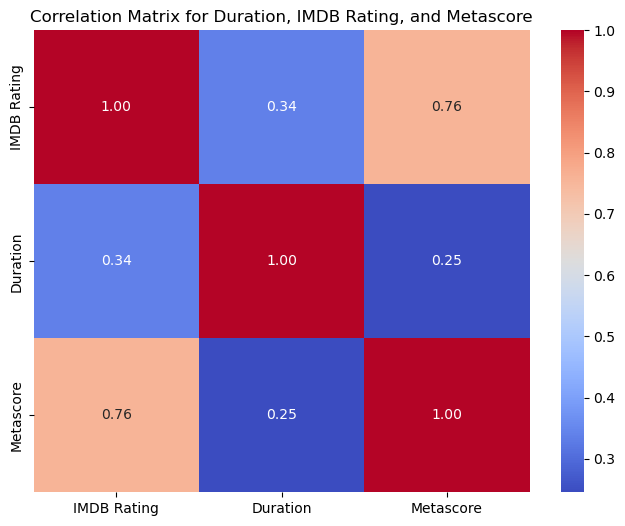

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame named 'data'

# Selecting the columns of interest
selected_columns = ['IMDB Rating','Duration',  'Metascore']
selected_data = data[selected_columns]

# Calculating the correlation matrix
correlation_matrix = selected_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Duration, IMDB Rating, and Metascore')
plt.show()


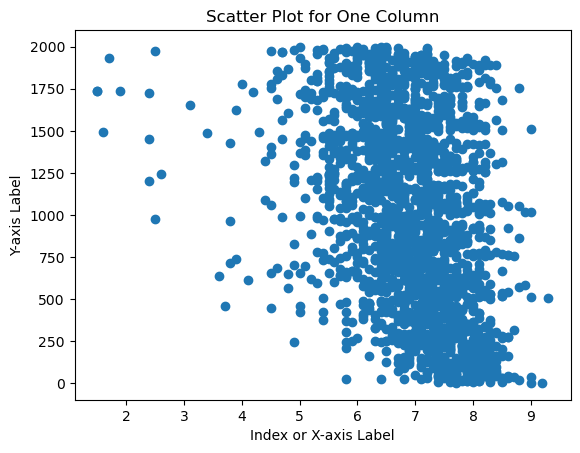

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
 
plt.scatter( data['IMDB Rating'],data.index)
plt.xlabel('Index or X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Scatter Plot for One Column')
plt.show()

In [6]:
data.shape

(2000, 10)

<Axes: >

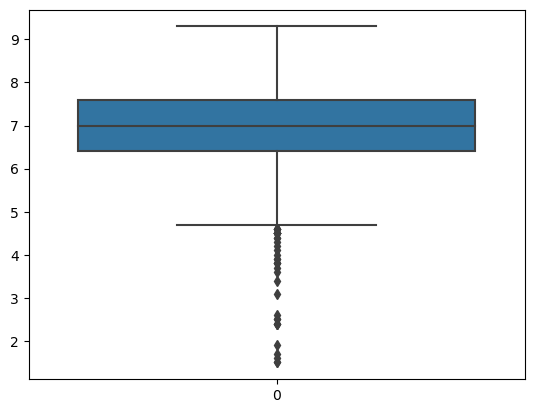

In [7]:

# Box Plot
import seaborn as sns
sns.boxplot(data['IMDB Rating'])

In [8]:
# Drop any rows with missing values
data.dropna(inplace=True)

# Detect and handle outlier data
outliers = data[(np.abs(data['IMDB Rating'] - data['IMDB Rating'].mean()) > (3 * data['IMDB Rating'].std()))]

data = data[(np.abs(data['IMDB Rating'] - data['IMDB Rating'].mean()) <= (3 * data['IMDB Rating'].std()))]
 

In [9]:
outliers.describe()

,Duration,IMDB Rating,Metascore
count,17.000000,17.000000,17.000000
mean,102.411765,3.288235,21.588235
std,12.889234,0.666035,10.130763
min,85.000000,2.400000,9.000000
25%,90.000000,2.500000,14.000000
50%,102.000000,3.600000,20.000000
75%,110.000000,3.800000,27.000000
max,125.000000,4.100000,45.000000


In [10]:
outliers.describe()


,Duration,IMDB Rating,Metascore
count,17.000000,17.000000,17.000000
mean,102.411765,3.288235,21.588235
std,12.889234,0.666035,10.130763
min,85.000000,2.400000,9.000000
25%,90.000000,2.500000,14.000000
50%,102.000000,3.600000,20.000000
75%,110.000000,3.800000,27.000000
max,125.000000,4.100000,45.000000


In [11]:
Values = data.values
Values = Values[:, 3]
print(Values)



[9.2 9.0 7.7 ... 6.5 6.4 6.0]


In [29]:
def k_means_clustering(Values, K, distance_measure):
    # Step 1: Initialize random cluster centers (centroids) based on the K
    centroids = data.sample(n=K).values
#     print(centroids)
    centroids = centroids[:, 3]
#     print(centroids)
    # Step 2: Iterate over the data rows, calculate the distance between each row and each one of the random centroids
    # and assign the row to the closest centroid, until convergence which means that the centroids don't change
    isDifference = 1
    clusters = {}
    while isDifference:
        for row_index, row_itself in enumerate(Values):
            
            # Iterating over the rows
            list_of_distances = []
            for cluster_index, centroid in enumerate(centroids):
                
                
                # Iterating over the centroids                    
                    # Euclidean distance
                centroid = np.array(centroid)
                row_itself = np.array(row_itself)
                distance = np.sqrt(np.sum((centroid - row_itself)**2))
                list_of_distances.append(distance)
          

            # Assigning the row_index to the closest centroid
            clusters[row_index] = list_of_distances.index(min(list_of_distances))
            # print(clusters)
        
        # Step 3: Calculate the new centroids based on the new cluster assignments
        new_centroids = pd.DataFrame(Values).groupby(by=clusters).mean().values
        print(f'New Centroids {new_centroids}')
        # Step 4: Check if the centroids have changed, if not then we are done
        print(f'Centroids {centroids}')
        if np.count_nonzero((centroids)-(new_centroids)) == 0:
            isDifference = 0
        else:
            centroids = new_centroids
        
    return clusters, centroids

In [30]:
k=3
clusters, centroids = k_means_clustering(Values, k, 1)
print('#'*50)
print(f'Final Clusters: {clusters}')
print(f'Final Centroids: {centroids}')

New Centroids [[5.792757009345798]
 [7.010058593750006]
 [8.036408977556105]]
Centroids [5.5 7.3 7.9]
New Centroids [[5.87388663967612]
 [7.0068926553672375]
 [7.9691983122362675]]
Centroids [[5.792757009345798]
 [7.010058593750006]
 [8.036408977556105]]
New Centroids [[5.87388663967612]
 [6.958560794044671]
 [7.902169981916804]]
Centroids [[5.87388663967612]
 [7.0068926553672375]
 [7.9691983122362675]]
New Centroids [[5.87388663967612]
 [6.958560794044671]
 [7.902169981916804]]
Centroids [[5.87388663967612]
 [6.958560794044671]
 [7.902169981916804]]
##################################################
Final Clusters: {0: 2, 1: 2, 2: 2, 3: 2, 4: 2, 5: 2, 6: 2, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 17: 0, 18: 1, 19: 2, 20: 1, 21: 0, 22: 2, 23: 2, 24: 2, 25: 2, 26: 2, 27: 2, 28: 2, 29: 1, 30: 2, 31: 2, 32: 2, 33: 2, 34: 1, 35: 2, 36: 2, 37: 2, 38: 2, 39: 2, 40: 1, 41: 2, 42: 2, 43: 2, 44: 2, 45: 2, 46: 2, 47: 2, 48: 2, 49: 2, 50: 1, 51: 2, 52: 2, 53: 2, 54: 2, 

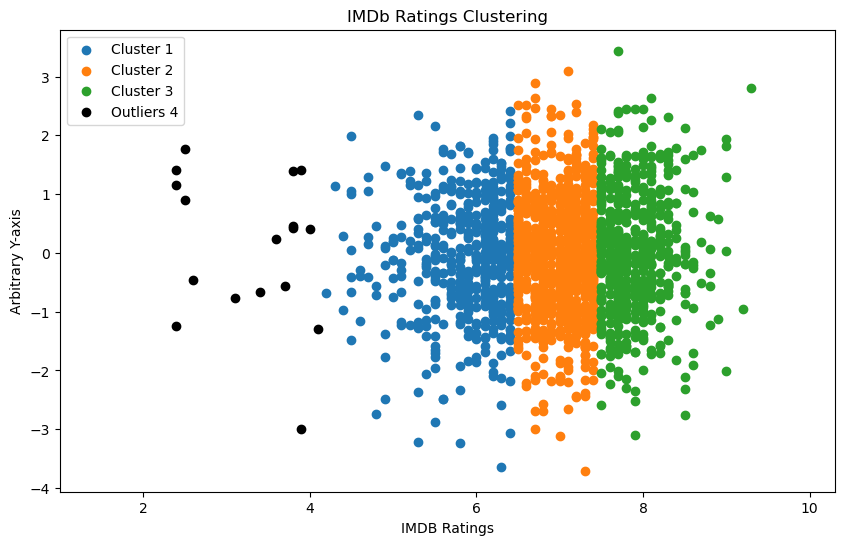

In [31]:
# Create a scatter plot to visualize the clusters
plt.figure(figsize=(10, 6))
for i in range(k):  # We assume K=4 for this example
    cluster_indices = np.where(np.array(list(clusters.values())) == i)[0]
    plt.scatter(Values[cluster_indices], np.random.normal(size=len(cluster_indices)), label=f'Cluster {i+1}')

# Visualize outliers
if len(outliers) > 0:
    plt.scatter(outliers['IMDB Rating'], np.random.normal(size=len(outliers)), color='black', label=f'Outliers {k+1}')

plt.title('IMDb Ratings Clustering')
plt.xlabel('IMDB Ratings')
plt.ylabel('Arbitrary Y-axis')
plt.xlim(1, max(data['IMDB Rating'])+1)  
plt.legend()
plt.show()

In [32]:
for i in range(k):
    print(f"---------- Cluster {i+1}: ----------")
    cluster_indices = np.where(np.array(list(clusters.values())) == i)[0]
    for idx in cluster_indices:
        print(data.iloc[idx]['Movie Name'],"--->" ,data.iloc[idx]['IMDB Rating'])
    print('*'*100)

---------- Cluster 1: ----------
The Blue Lagoon ---> 5.8
Friday the 13th ---> 6.4
Death Race 2000 ---> 6.2
Jaws 2 ---> 5.8
Endless Love ---> 4.9
Star Trek: The Motion Picture ---> 6.4
Cocktail ---> 5.9
Splash ---> 6.3
Teenage Mutant Ninja Turtles II: The Secret of the Ooze ---> 6.0
RoboCop 2 ---> 5.8
Dune ---> 6.3
Predator 2 ---> 6.3
Honey, I Shrunk the Kids ---> 6.4
Alien³ ---> 6.4
Look Who's Talking ---> 5.9
Police Academy 2: Their First Assignment ---> 5.8
Police Academy 3: Back in Training ---> 5.4
Legend ---> 6.3
Cujo ---> 6.1
The Jewel of the Nile ---> 6.1
A View to a Kill ---> 6.3
The Karate Kid Part II ---> 6.1
Rocky V ---> 5.4
Over the Top ---> 5.8
Cyborg ---> 5.0
Always ---> 6.4
Twilight Zone: The Movie ---> 6.4
Mad Max Beyond Thunderdome ---> 6.2
Grease 2 ---> 4.5
Flashdance ---> 6.2
Superman III ---> 5.0
Days of Thunder ---> 6.1
Kindergarten Cop ---> 6.2
Dick Tracy ---> 6.2
Lord of the Flies ---> 6.4
Tales from the Darkside: The Movie ---> 6.2
Lionheart ---> 6.2
Air Americ

In [16]:
print(outliers[['Movie Name', 'IMDB Rating']].to_string(index=False))


                      Movie Name  IMDB Rating
Superman IV: The Quest for Peace          3.7
                  Street Fighter          4.1
     Mortal Kombat: Annihilation          3.6
                  Batman & Robin          3.8
         Speed 2: Cruise Control          3.9
                    The Avengers          3.8
               Battlefield Earth          2.5
                         Glitter          2.4
                           Gigli          2.6
                  The Wicker Man          3.8
               Alone in the Dark          2.4
                        Catwoman          3.4
                      Prom Night          3.9
                           Bratz          3.1
                      Epic Movie          2.4
              The Last Airbender          4.0
            Dragonball Evolution          2.5
